In [196]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import math
from nltk.corpus import stopwords


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/yelp_labelled.csv
/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/amazon_cells_labelled.txt
/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/imdb_labelled.txt
/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/imdb_labelled.csv
/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/readme.txt
/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/amazon_cells_labelled.csv
/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/yelp_labelled.txt
/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.csv
/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt
/kaggle/input/sentiment-labelled-s

# Read the txt file of IMDB, Amazon, Yelp from kaggle database.

In [197]:
imdb_df = pd.read_csv("/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt", 
                        delimiter='\t', 
                        header=None, 
                        names=['Review', 'sentiment'])

amazon_df = pd.read_csv("/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt", 
                        delimiter='\t', 
                        header=None, 
                        names=['Review', 'sentiment'])

yelp_df = pd.read_csv("/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt", 
                        delimiter='\t', 
                        header=None, 
                        names=['Review', 'sentiment'])

In [198]:
imdb_df

,Review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [199]:
amazon_df

,Review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [200]:
yelp_df

,Review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# Cleaning the dataset.

In [201]:
final_set = [imdb_df, amazon_df, yelp_df]
final_df = pd.concat(final_set)

final_df = final_df.replace(['$', '#', '!', '@', '\?', '<', '>', '\*', '\\\\' '\{', '\}', '\[', '\]', '\(', '\)', ':', ';', '"', '\. ', ', ', "' ", " '"], 
                '', regex=True)

In [202]:
final_df.head()

,Review,sentiment
0,A veryveryvery slow-movingaimless movie about ...,0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of,0
4,The best scene in the movie was when Gerardo i...,1


**Reset the index after joining the datasets**

In [203]:
final_df.reset_index(drop='True',inplace=True)
final_df

,Review,sentiment
0,A veryveryvery slow-movingaimless movie about ...,0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,The whole experience was underwhelmingand I th...,0


In [204]:
def make_probability_chart(dataframe, target, column):
    f, ax = plt.subplots(figsize=(12, 8))
    dataframe.groupby([column])[target].mean().plot(kind='bar')
    plt.title(f'{target} by {column}')
    plt.ylabel(f"Probability of {target}")
    xvals = ax.get_xticks()
    yvals = ax.get_yticks()
    ax.set_yticklabels(['{:,.2%}'.format(x) for x in yvals])
    f.autofmt_xdate()
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


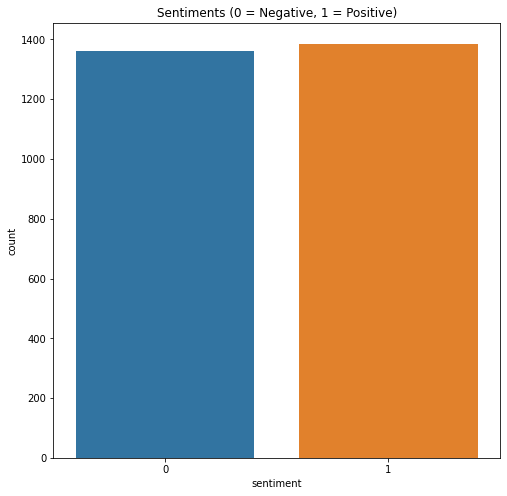

In [205]:
f, ax = plt.subplots(figsize=(8, 8))
nsurvivors = sns.countplot(final_df['sentiment']).set_title(
    'Sentiments (0 = Negative, 1 = Positive)')
plt.show()

In [206]:
final_df.shape

(2748, 2)

In [207]:
final_df.describe()

,sentiment
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [208]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     2748 non-null   object
 1   sentiment  2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


**Split the dataset into train, test and dev.**

In [209]:
split_1 = int(0.8 * len(final_df))
split_2 = int(0.9 * len(final_df))
train_data = final_df[:split_1]
dev_data = final_df[split_1:split_2]
test_data = final_df[split_2:]

In [210]:
train_data

,Review,sentiment
0,A veryveryvery slow-movingaimless movie about ...,0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
2193,Not to mention the combination of pearsalmonds...,1
2194,Will not be back.,0
2195,Sauce was tasteless.,0
2196,The food is delicious and just spicy enoughso ...,1


In [211]:
test_data

,Review,sentiment
2473,Great food and awesome service,1
2474,One nice thing was that they added gratuity on...,1
2475,A FLY was in my apple juice.A FLY,0
2476,The Han Nan Chicken was also very tasty.,1
2477,As for the serviceI thought it was good.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,The whole experience was underwhelmingand I th...,0


In [212]:
dev_data

,Review,sentiment
2198,I don't think we'll be going back anytime soon.,0
2199,Food was so gooodd.,1
2200,I am far from a sushi connoisseur but I can de...,0
2201,I was so insulted.,0
2202,The last 3 times I had lunch here has been bad.,0
...,...,...
2468,Cutequaintsimplehonest.,1
2469,The chicken was deliciously seasoned and had t...,1
2470,The food was great as alwayscompliments to the...,1
2471,Special thanks to Dylan Tfor the recommendatio...,1


**Word Cloud**

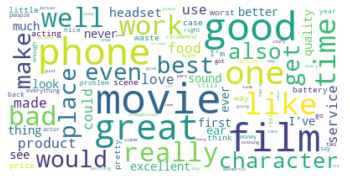

In [213]:
text = " ".join(review for review in train_data.Review)


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

# **Building Vocabulary**

In [214]:
vocabulary = {}
for index, row in train_data.iterrows():
    for word in set(row['Review'].lower().split()):
        if word in vocabulary:
            if row['sentiment'] == 1:
                vocabulary[word][0] += 1
                vocabulary[word][1] += 1
            else:
                vocabulary[word][0] += 1
                vocabulary[word][2] += 1
        else:
            if row['sentiment'] == 1:
                vocabulary[word] = [1, 1, 0]
            else:
                vocabulary[word] = [1, 0, 1]

In [215]:
for word in list(vocabulary):
    if vocabulary[word][0] < 5:
        del vocabulary[word]

In [216]:
print(len(vocabulary))
dict(list(vocabulary.items())[0:3])

645


{'a': [536, 286, 250], 'man': [9, 5, 4], 'about': [60, 26, 34]}

# **Probability of the occurrence of the word**

In [217]:
num_reviews = len(train_data)
num_positive_reviews = (train_data.sentiment == 1).sum()
num_negative_reviews = (train_data.sentiment == 0).sum()
print(num_reviews, num_positive_reviews, num_negative_reviews)

2198 1137 1061


In [218]:
for word in vocabulary:
    vocabulary[word].append(vocabulary[word][0]/num_reviews)
    vocabulary[word].append(vocabulary[word][1]/num_positive_reviews)
    vocabulary[word].append(vocabulary[word][2]/num_negative_reviews)
dict(list(vocabulary.items())[0:3])

{'a': [536,
  286,
  250,
  0.24385805277525022,
  0.2515391380826737,
  0.235626767200754],
 'man': [9,
  5,
  4,
  0.004094631483166515,
  0.0043975373790677225,
  0.003770028275212064],
 'about': [60,
  26,
  34,
  0.0272975432211101,
  0.022867194371152155,
  0.03204524033930255]}

# **Calculate accuracy using dev dataset**

In [219]:
prediction = {}
correct = 0
for index, row in dev_data.iterrows():
    prob_words_positive = 0
    prob_words_negative = 0
    
    for word in set(row['Review'].lower().split()):
        if word in vocabulary:
            if vocabulary[word][4] == 0:
                prob_words_negative = 0
            elif vocabulary[word][5] == 0:
                prob_words_positive = 0
            else:
                prob_words_positive = prob_words_positive + math.log(vocabulary[word][4])
                prob_words_negative = prob_words_negative + math.log(vocabulary[word][5])
                
                
    prob_words_positive = pow(math.e, prob_words_positive)
    prob_words_negative = pow(math.e, prob_words_negative)
    
    if (prob_words_positive * (num_pos_reviews/num_reviews)) > (prob_words_negative * (num_neg_reviews/num_reviews)):
        prediction[index] = 1
    else:
        prediction[index] = 0
    
    if prediction[index] == row['sentiment']:
            correct += 1

dev_accuracy = correct/len(dev_data)

In [220]:
print(dev_accuracy)

0.7563636363636363


**Combining train and dev datasets as one dataset**

In [221]:
frames = [train_data,dev_data]
practice_data = pd.concat(frames)
practice_data

,Review,sentiment
0,A veryveryvery slow-movingaimless movie about ...,0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
2468,Cutequaintsimplehonest.,1
2469,The chicken was deliciously seasoned and had t...,1
2470,The food was great as alwayscompliments to the...,1
2471,Special thanks to Dylan Tfor the recommendatio...,1


In [222]:
cv_df = np.array_split(practice_data, 5)
cv_df[0].head()

,Review,sentiment
0,A veryveryvery slow-movingaimless movie about ...,0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of,0
4,The best scene in the movie was when Gerardo i...,1


# **Conduct five fold cross validation**

In [223]:
vocabulary_cv = [{}, {}, {}, {}, {}]
prob_estimate = [{}, {}, {}, {}, {}]
num_reviews = [0, 0, 0, 0, 0]
num_positive_reviews = [0, 0, 0, 0, 0]
num_negative_reviews = [0, 0, 0, 0, 0]
for i in range(5):
    dev_cv = cv_df[i]
    train_cv = pd.DataFrame(columns = ['Review', 'sentiment'])
    for j in range(5):
        if j != i:
            train_cv = train_cv.append(cv_df[j])
    
    print(train_cv.head())
    print(dev_cv.head())
    
    for index, row in train_cv.iterrows(): 
        for word in set(row['Review'].lower().split()):
            if word in vocabulary_cv[i]:
                if row['sentiment'] == 1:
                    vocabulary_cv[i][word][0] += 1
                    vocabulary_cv[i][word][1] += 1
                else:
                    vocabulary_cv[i][word][0] += 1
                    vocabulary_cv[i][word][2] += 1
            else:
                if row['sentiment'] == 1:
                    vocabulary_cv[i][word] = [1, 1, 0]
                else:
                    vocabulary_cv[i][word] = [1, 0, 1]
    
    
    
    
    for word in list(vocabulary_cv[i]):
        if vocabulary_cv[i][word][0] < 5:
            del vocabulary_cv[i][word]
            
    
    
    num_reviews[i] = len(train_cv)
    num_positive_reviews[i] = (train_cv.sentiment == 1).sum()
    num_negative_reviews[i] = (train_cv.sentiment == 0).sum()
    print(num_reviews, num_positive_reviews, num_negative_reviews)
    
    num_vocab_words = len(vocabulary_cv[i])
    
    for word in vocabulary_cv[i]:
        
        prob_estimate[i][word] = [(vocabulary_cv[i][word][0]/num_reviews[i]),
                                  (vocabulary_cv[i][word][1]/num_positive_reviews[i]),
                                  (vocabulary_cv[i][word][2]/num_negative_reviews[i]),
                                  ((vocabulary_cv[i][word][1] + 1)/(num_positive_reviews[i]+num_vocab_words)),
                                  ((vocabulary_cv[i][word][2]+1)/(num_negative_reviews[i]+num_vocab_words))]

    

                                                Review sentiment
495                   I advise you to look out for it          1
496                               You wont regret it           1
497                            Highly recommended A+           1
498     Well..Just if you keep thinking how bad it is          0
499  It's a mediocremiserablehollowlaughable and pr...         0
                                              Review  sentiment
0  A veryveryvery slow-movingaimless movie about ...          0
1  Not sure who was more lost - the flat characte...          0
2  Attempting artiness with black & white and cle...          0
3         Very little music or anything to speak of           0
4  The best scene in the movie was when Gerardo i...          1
[1978, 0, 0, 0, 0] [1069, 0, 0, 0, 0] [909, 0, 0, 0, 0]
                                              Review sentiment
0  A veryveryvery slow-movingaimless movie about ...         0
1  Not sure who was more lost - the flat cha

# **Compare the effect of Smoothing**

In [224]:
accurecy_positive_cv = [0, 0, 0, 0, 0]
accurecy_negative_cv = [0, 0, 0, 0, 0]
accurecy_cv = [0, 0, 0, 0, 0]
accurecy_smooth_positive_cv = [0, 0, 0, 0, 0]
accurecy_smooth_negative_cv = [0, 0, 0, 0, 0]
accurecy_smooth_cv = [0, 0, 0, 0, 0]

for i in range(5):
    correct = 0
    correct_positive = 0
    correct_negative = 0
    correct_smooth = 0
    correct_smooth_positive = 0
    correct_smooth_negative = 0
    for index, row in dev_cv.iterrows():
        log_prob_words_positive = 0
        log_prob_words_negative = 0
        log_prob_words_positive_smooth = 0
        log_prob_words_negative_smooth = 0

        for word in set(row['Review'].lower().split()):
            if word in vocabulary_cv[i]:
                if prob_estimate[i][word][1] == 0:
                    prob_words_negative = 0
                elif prob_estimate[i][word][2] == 0:
                    prob_words_positive = 0
                else:
                    log_prob_words_positive = log_prob_words_positive + math.log(prob_estimate[i][word][1])
                    log_prob_words_negative = log_prob_words_negative + math.log(prob_estimate[i][word][2])
                log_prob_words_positive_smooth = log_prob_words_positive_smooth + math.log(prob_estimate[i][word][3])
                log_prob_words_negative_smooth = log_prob_words_negative_smooth + math.log(prob_estimate[i][word][4])
    
        prob_words_positive = pow(math.e, log_prob_words_positive)
        prob_words_negative = pow(math.e, log_prob_words_negative)
        prob_words_positive_smooth = pow(math.e, log_prob_words_positive_smooth)
        prob_words_negative_smooth = pow(math.e, log_prob_words_negative_smooth)

        if ((prob_words_positive * (num_positive_reviews[i]/num_reviews[i])) > (prob_words_negative * (num_negative_reviews[i]/num_reviews[i]))):
            prediction[index] = 1
        else:
            prediction[index] = 0

        if prediction[index] == row['sentiment']:
            correct += 1
            if row['sentiment'] == 1:
                correct_positive += 1
            else:
                correct_negative += 1
                
                
        
        if ((prob_words_positive_smooth * (num_positive_reviews[i]/num_reviews[i])) > 
            (prob_words_negative_smooth * (num_negative_reviews[i]/num_reviews[i]))):
            prediction[index] = 1
        else:
            prediction[index] = 0

        if prediction[index] == row['sentiment']:
            correct_smooth += 1
            if row['sentiment'] == 1:
                correct_smooth_positive += 1
            else:
                correct_smooth_negative += 1
                

    accurecy_positive_cv[i] =  correct_positive/(dev_cv.sentiment == 1).sum()
    accurecy_negative_cv[i] =  correct_negative/(dev_cv.sentiment == 0).sum()
    accurecy_cv[i] =  correct/len(dev_cv)
    accurecy_smooth_positive_cv[i] =  correct_smooth_positive/(dev_cv.sentiment == 1).sum()
    accurecy_smooth_negative_cv[i] =  correct_smooth_negative/(dev_cv.sentiment == 0).sum()
    accurecy_smooth_cv[i] =  correct_smooth/len(dev_cv)

In [225]:
print(accurecy_cv)
print(accurecy_smooth_cv)
print(sum(accurecy_cv)/len(accurecy_cv))
print(sum(accurecy_smooth_cv)/len(accurecy_smooth_cv))

[0.8016194331983806, 0.7692307692307693, 0.7874493927125507, 0.7854251012145749, 0.7004048582995951]
[0.8340080971659919, 0.8299595141700404, 0.8380566801619433, 0.840080971659919, 0.7206477732793523]
0.7688259109311741
0.8125506072874493


# **Derive Top 10 words that predicts positive and negative class**

In [226]:
positive_prob_word = []
for word in vocabulary:
    positive_prob_word.append([vocabulary[word][1]/vocabulary[word][0], word])
positive_prob_word = sorted(positive_prob_word)
for i in range(10):
    print(positive_prob_word[i][1], positive_prob_word[i][0])

action 0.0
annoying 0.0
difficult 0.0
disappointing 0.0
disappointment 0.0
hate 0.0
involved 0.0
junk. 0.0
mediocre 0.0
might 0.0


In [227]:
positive_prob_word = sorted(positive_prob_word, reverse = True)
for i in range(10):
    print(positive_prob_word[i][1], positive_prob_word[i][0])

terrific 1.0
quickly 1.0
pleased 1.0
perfect 1.0
joy 1.0
interesting 1.0
hope 1.0
hilarious 1.0
here. 1.0
fresh 1.0


# **Final Accuracy**

In [228]:
prediction = {}
correct = 0

num_reviews = len(train_data)
num_positive_reviews = (train_data.sentiment == 1).sum()
num_negative_reviews = (train_data.sentiment == 0).sum()

for index, row in test_data.iterrows():
    prob_words_positive = 0
    prob_words_negative = 0
    
    for word in set(row['Review'].lower().split()):
        if word in vocabulary:
            if vocabulary[word][4] == 0:
                prob_words_negative = 0
            elif vocabulary[word][5] == 0:
                prob_words_positive = 0
            else:
                prob_words_positive = prob_words_positive + math.log(vocabulary[word][4])
                prob_words_negative = prob_words_negative + math.log(vocabulary[word][5])
                
                
    prob_words_positive = pow(math.e, prob_words_positive)
    prob_words_negative = pow(math.e, prob_words_negative)
    
    if (prob_words_positive * (num_positive_reviews / num_reviews)) > (prob_words_negative * (num_negative_reviews/num_reviews)):
        prediction[index] = 1
    else:
        prediction[index] = 0
    
    if prediction[index] == row['sentiment']:
            correct += 1

test_accuracy = correct/len(test_data)
print(test_accuracy)

0.7381818181818182
